<a href="https://colab.research.google.com/github/amanjain487/panoptic-segmentation-using-DETR/blob/main/Train_Segmentation_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train Segmentation Model

## Freeze Weights of Box Model and train Mask Head

## Get CUDA Device Properties

In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.11.0+cu113 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


# Mount Drive

- To retrieve the trained Box Model
- To save the segmentation model which will be trained

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Install Required Libraries/Packages

In [3]:
!pip install git+https://github.com/cocodataset/panopticapi.git

  Cloning https://github.com/cocodataset/panopticapi.git to /tmp/pip-req-build-ztfx4c8s
  Running command git clone -q https://github.com/cocodataset/panopticapi.git /tmp/pip-req-build-ztfx4c8s
  Created wheel for panopticapi: filename=panopticapi-0.1-py3-none-any.whl size=8306 sha256=69f786c9faa37f18c91dcac64c17c0b52642dbd26ae4243e33433a578d355356
  Stored in directory: /tmp/pip-ephem-wheel-cache-t7yyutop/wheels/ad/89/b8/b66cce9246af3d71d65d72c85ab993fd28e7578e1b0ed197f1
Successfully built panopticapi


## Train Segmentation Model

- By following instructions provided in DETR Readme.

In [4]:
# import os
 
# os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

# !python main.py --masks --epochs 60 --lr_drop 15 --coco_path ../data/  --coco_panoptic_path ../data/  --dataset_file coco_panoptic --frozen_weights "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/box_model/checkpoint.pth" --output_dir "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/segm_model" --resume "/content/drive/MyDrive/Panoptic Segmentation using DETR/detr/output/segm_model/checkpoint0014.pth"


# Visualize Loss and Accuracies


In [6]:
import os
 
os.chdir("/content/drive/MyDrive/Panoptic Segmentation using DETR/detr")

from util.plot_utils import plot_logs

from pathlib import Path

log_directory = [Path('output/segm_model/')]

## Loss and mAP

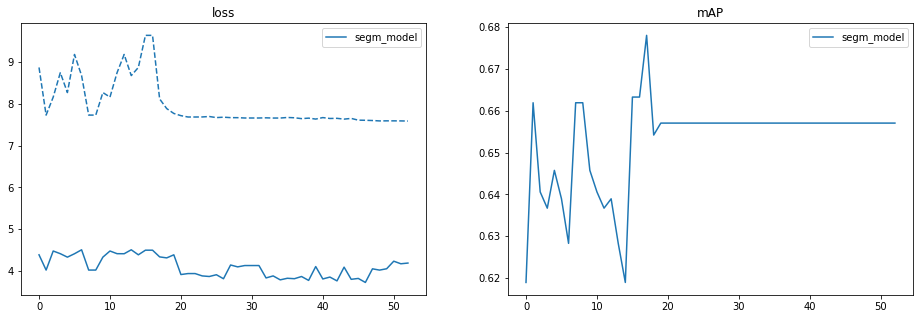

In [7]:
fields_of_interest = (
    'loss',
    'mAP',
    )

plot_logs(log_directory,
          fields_of_interest)

## GIOU and CE Loss

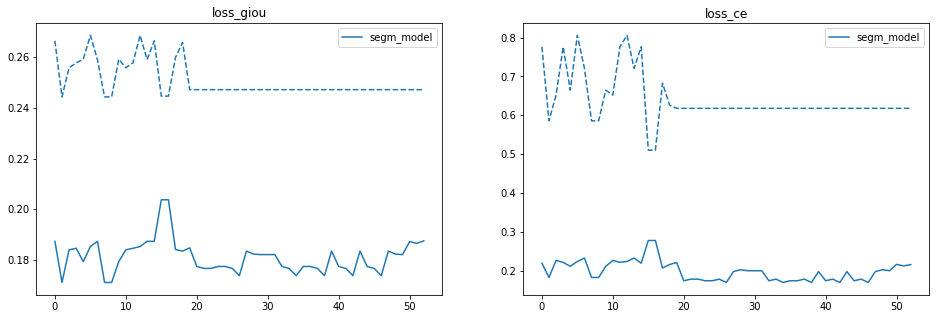

In [8]:
fields_of_interest = (
    'loss_giou',
    'loss_ce',
    )

plot_logs(log_directory,
          fields_of_interest)

## Class and Cardinality Error

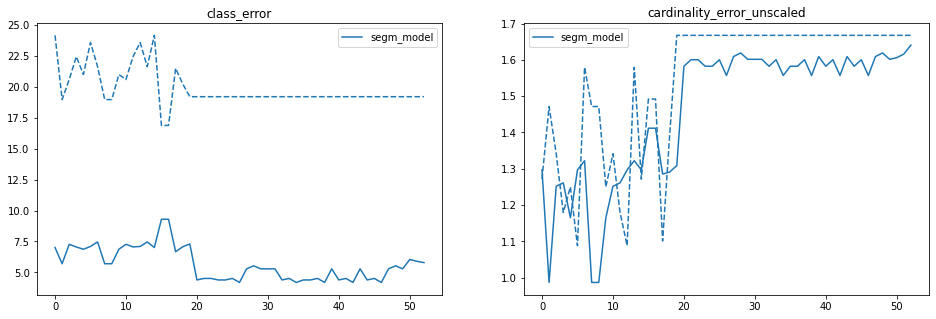

In [9]:
fields_of_interest = (
    'class_error',
    'cardinality_error_unscaled',
    )

plot_logs(log_directory,
          fields_of_interest)